In [2]:
import sys
sys.path.append('/Users/michal/PythonProjects/MOTIVE')
from simulation_parameters import *
from imports_file import *

Host name:  Michals-MacBook-Pro.local


# PSD 1D

### upload dataset

In [94]:
dst_path = os.path.join(data_path_psd1d, "psd1_test_1.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['freq'][:]/4
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

### plot psd

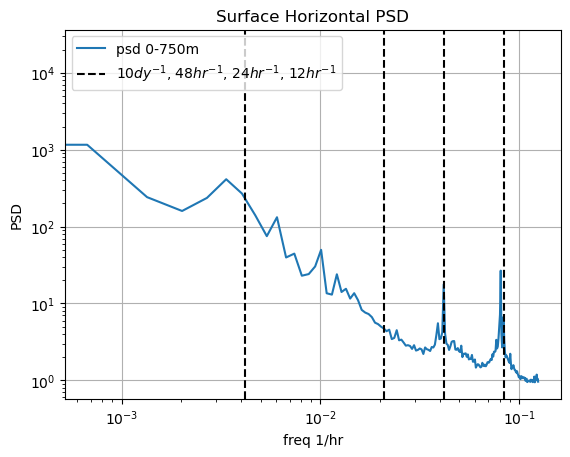

In [110]:
# plt.plot(freq, psd.mean(axis=0))
plt.plot(freq, psd.mean(axis=0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq 1/hr')
plt.ylabel('PSD')
plt.title('Surface Horizontal PSD')
plt.grid(True)
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['psd 0-750m', '10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'])
plt.show()

(41, 186) (41,) (186,)


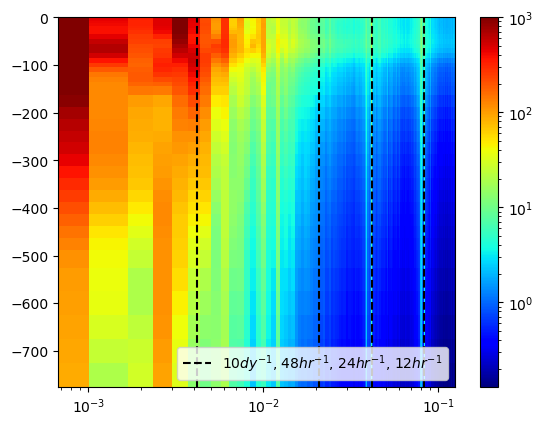

In [117]:
plt.close()
print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=1e3)
plt.pcolormesh(freq,depths,psd, shading='nearest', norm=norm, cmap='jet')
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'],loc=4)
plt.xscale('log')
plt.xlim(freq[1],freq[-1])
plt.colorbar()
plt.show()

In [16]:
np.where(depths==-200)

(array([23]),)

In [26]:
dst_path = os.path.join(data_path_psd, "psd2d_xi_223_1333_eta_137_137.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['kh'][:]
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

In [27]:
# plt.plot(freq, psd.mean(axis=0))
plt.plot(freq, psd[1,:])
plt.plot(freq, psd[10,:])
plt.plot(freq, psd[23,:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('kh 1/km')
plt.ylabel('PSD')
plt.grid(True)
plt.legend(['psd 1m', 'psd 40m', 'psd 200m'])
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

In [22]:
freq= freq_for_fft(len_xi_u, 2e3, N2=len_eta_v, D2=2e3) 

In [23]:
freq

array([0.00000000e+00, 1.90810828e-06, 3.81621657e-06, 5.72432485e-06,
       7.63243313e-06, 9.54054142e-06, 1.14486497e-05, 1.33567580e-05,
       1.52648663e-05, 1.71729745e-05, 1.90810828e-05, 2.09891911e-05,
       2.28972994e-05, 2.48054077e-05, 2.67135160e-05, 2.86216242e-05,
       3.05297325e-05, 3.24378408e-05, 3.43459491e-05, 3.62540574e-05,
       3.81621657e-05, 4.00702739e-05, 4.19783822e-05, 4.38864905e-05,
       4.57945988e-05, 4.77027071e-05, 4.96108154e-05, 5.15189236e-05,
       5.34270319e-05, 5.53351402e-05, 5.72432485e-05, 5.91513568e-05,
       6.10594651e-05, 6.29675733e-05, 6.48756816e-05, 6.67837899e-05,
       6.86918982e-05, 7.06000065e-05, 7.25081148e-05, 7.44162230e-05,
       7.63243313e-05, 7.82324396e-05, 8.01405479e-05, 8.20486562e-05,
       8.39567645e-05, 8.58648727e-05, 8.77729810e-05, 8.96810893e-05,
       9.15891976e-05, 9.34973059e-05, 9.54054142e-05, 9.73135224e-05,
       9.92216307e-05, 1.01129739e-04, 1.03037847e-04, 1.04945956e-04,
      